# Face Recognition Assignment
### Shriyansh Singh
#### CECS 406 Sec-01
#### Assignment 5

In [1]:
# Install the libraries
!pip install git+https://github.com/rcmalli/keras-vggface.git
!pip install MTCNN

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-kjr4vyfq
  Running command git clone --filter=blob:none --quiet https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-kjr4vyfq
  Resolved https://github.com/rcmalli/keras-vggface.git to commit bee35376e76e35d00aeec503f2f242611a97b38a
  Preparing metadata (setup.py) ... done
  Created wheel for keras_vggface: filename=keras_vggface-0.6-py3-none-any.whl size=8292 sha256=d8abb586a0682a491f70f21dd23e3cb934827f821095193a36e61413e94ebd42
  Stored in directory: /tmp/pip-ephem-wheel-cache-1k5mg7dj/wheels/62/cd/e0/3a2d2fe84d014324aed54d420cab52df65a774d9b296c63996
Successfully built keras_vggface
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.8 MB/s eta 0:00:00


In [2]:
# Was having compatibility issues
!pip install tensorflow==2.12.0 keras==2.12.0 keras-vggface==0.6 keras_applications==1.0.8

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 115.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 9.3 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  A

In [1]:
# Checking packages downloaded with correct package version after restarting the session
!pip show tensorflow keras keras-vggface keras-applications

Name: tensorflow
Version: 2.12.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, jax, keras, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras
---
Name: keras
Version: 2.12.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: keras_vggface, tensorflow
---
Name: keras_vggface
Version: 0.6
Summary: VGGFace implementation with Keras framework
Home-page: https://github.com/rcmalli/keras-vggface
Author: 

In [2]:
!pip show keras_vggface MTCNN

Name: keras_vggface
Version: 0.6
Summary: VGGFace implementation with Keras framework
Home-page: https://github.com/rcmalli/keras-vggface
Author: Refik Can MALLI
Author-email: mallir@itu.edu.tr
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: h5py, keras, numpy, pillow, pyyaml, scipy, six
Required-by: 
---
Name: mtcnn
Version: 1.0.0
Summary: Multitask Cascaded Convolutional Networks for face detection and alignment (MTCNN) in Python >= 3.10 and TensorFlow >= 2.12
Home-page: https://github.com/ipazc/mtcnn
Author: Iván de Paz Centeno
Author-email: ipazc@unileon.es
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, lz4
Required-by: 


In [29]:
'''
Loading up the LFW dataset
'''
from sklearn.datasets import fetch_lfw_people

# Loading the LFW dataset
lfw_dataset = fetch_lfw_people(color=True, resize=1.0, min_faces_per_person=30)

# X_data -> images, y_target -> labels, target_names -> actual names
# image_index -> number of images
X_images = lfw_dataset.images
y_labels = lfw_dataset.target
labeled_names = lfw_dataset.target_names

In [4]:
lfw_dataset.data.shape

(2370, 35250)

In [5]:
X_images.shape

(2370, 125, 94, 3)

In [6]:
y_labels.shape

(2370,)

In [7]:
labeled_names.shape

(34,)

In [30]:
'''
Conducting face detection on the 10 unique individuals
'''
import random
import numpy as np
from mtcnn import MTCNN
import cv2

# intializing the MTCNN model
face_detector = MTCNN()

# Initializing lists
processed_faces = [] # For Normalized graph(non-clustered)
processed_faces_1 = [] # For Non-normalized graph(clustered)
stored_labels = []

# Finding the total number of images
num_images = list(range(len(X_images)))

for idx in num_images:
    # Storing image and label by index
    img = X_images[idx]
    label = y_labels[idx]

    # Rescaling images
    pic = (img * 255).astype(np.uint8)

    # Detect faces using MTCNN
    detections = face_detector.detect_faces(pic)

    if detections:
        # Extract the bounding box of the first face detected
        x, y, w, h = detections[0]['box']

        # Ensure the box has positive width and height
        max_x = max(0, x)
        max_y = max(0, y)
        face = pic[max_y:y+h, max_x:x+w]

        # Resizing and normalizing faces
        resized_face= cv2.resize(face, (224, 224))
        normalized_face = resized_face / 255.0

        # Add to the list of processed faces and labels
        processed_faces.append(normalized_face)
        # Can't have clustered plot points if normalized
        processed_faces_1.append(resized_face)
        stored_labels.append(label)

# Convert the face list to a NumPy array
processed_faces = np.array(processed_faces)
processed_faces_1 = np.array(processed_faces_1)

In [31]:
# Checking if faces were processed
print(len(processed_faces))
print(len(processed_faces_1))

2342
2342


In [33]:
'''
Loading up the VGGFace model to compute 2048d embeddings for each face
'''
from keras_vggface.vggface import VGGFace
from keras.models import Model
from keras_vggface.utils import preprocess_input

# Loading the VGGFace model
base_model = VGGFace(model='resnet50', include_top=False,
                     input_shape=(224, 224, 3), pooling='avg')
embedding_model = Model(inputs=base_model.input, outputs=base_model.output)

# Changing the numerical type from 'uint8' to 'float32'
processed_faces = processed_faces.astype('float32')
processed_faces_1 = processed_faces_1.astype('float32')

# Processing faces for model inputs
processed_faces = preprocess_input(processed_faces)
processed_faces_1 = preprocess_input(processed_faces_1)

# List to store face embeddings
face_embeddings = embedding_model.predict(processed_faces)
face_embeddings_1 = embedding_model.predict(processed_faces_1)

74/74 [==============================] - 231s 3s/step


In [34]:
'''
Loading up t-SNE visualization to reduce the dimensionality of the embeddings
from 2048d to 2d
'''
from sklearn.manifold import TSNE

# Loading up t-SNE
t_SNE = TSNE(n_components=2, random_state=42)
# Applying t-SNE on the embeddings
face_embeddings_plot = t_SNE.fit_transform(face_embeddings)
face_embeddings_plot_1 = t_SNE.fit_transform(face_embeddings_1)

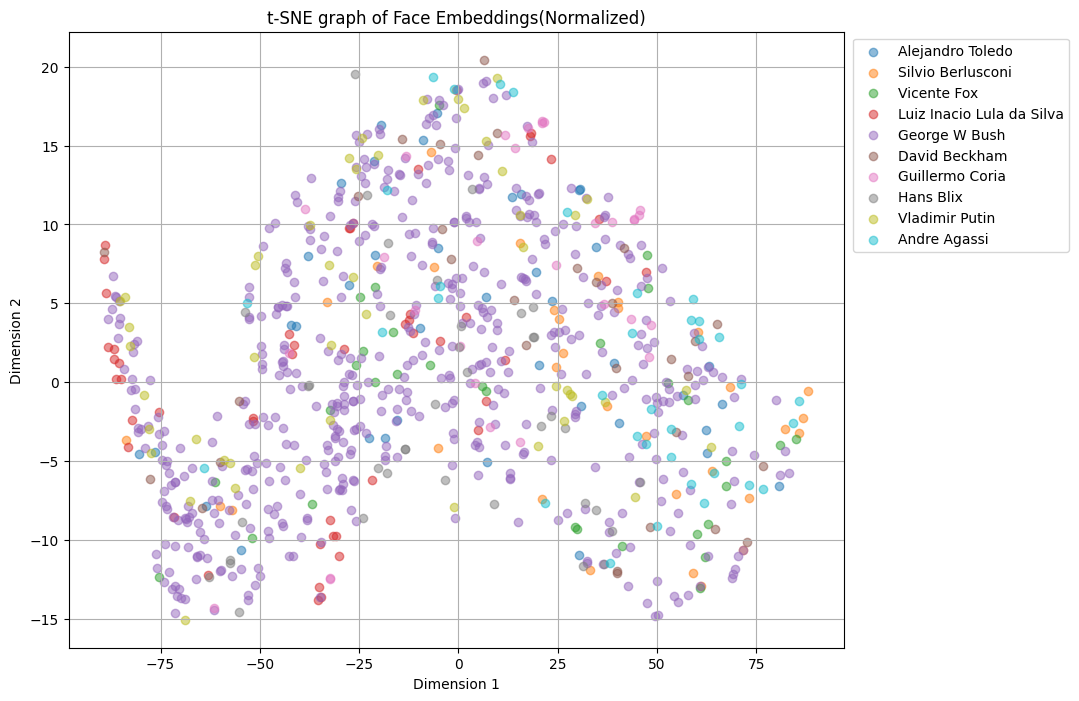

In [59]:
'''
Plotting out the visualization for the normalized, un-clustered graph
'''
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Getting unique and random labels
unique_labels = np.unique(stored_labels)
random_labels = np.random.choice(unique_labels, size=10, replace=False)

# Going thru 10 unique names
for label in random_labels:
    # Storing the index for the name
    idx = np.where(np.array(stored_labels) == label)[0]
    # Plotting the points for each label
    plt.scatter(face_embeddings_plot[idx, 0],
                face_embeddings_plot[idx, 1],
                label=labeled_names[label],
                alpha=0.5)

plt.title('t-SNE graph of Face Embeddings(Normalized)')
plt.legend(bbox_to_anchor=(1.3, 1.0), loc="upper right")
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()

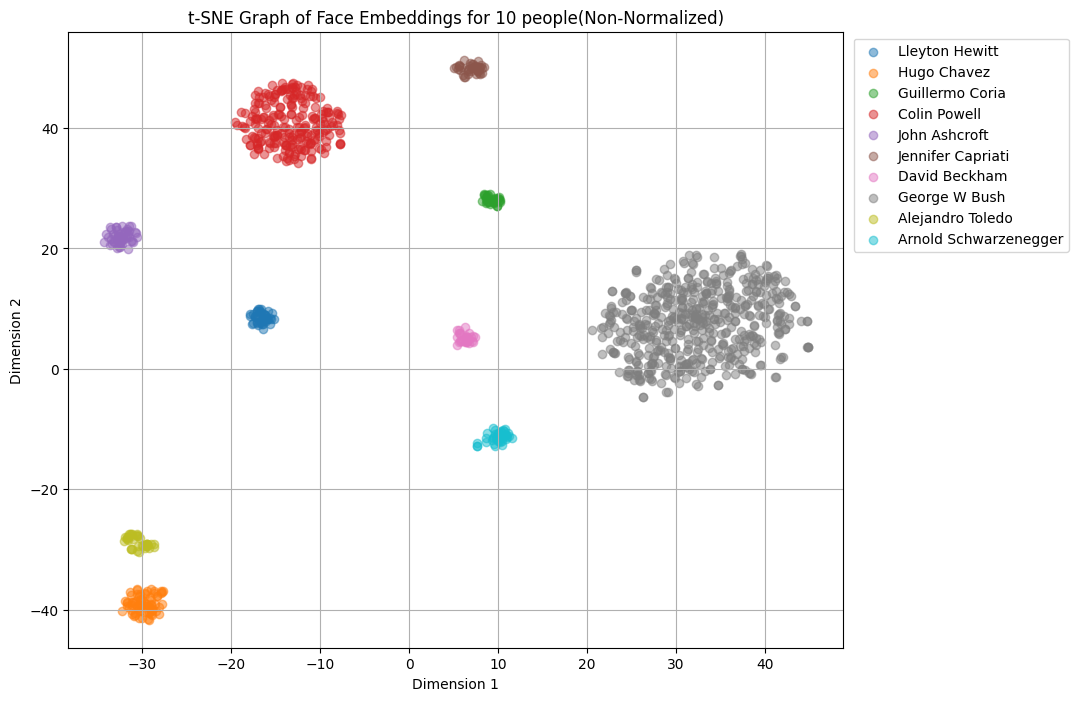

In [58]:
'''
Plotting out the visualization for the non-normalized, clustered graph
'''
plt.figure(figsize=(10, 8))

# Getting unique and random labels
unique_labels = np.unique(stored_labels)
random_labels = np.random.choice(unique_labels, size=10, replace=False)

# Filtering out the plot points that isn't respective to the label
mask = np.isin(stored_labels, random_labels)

# Going thru 10 unique names
for label in random_labels:
    # Storing the index for the name
    idx = np.where(np.array(stored_labels) == label)[0]
    # Plotting the points for each label
    plt.scatter(face_embeddings_plot_1[idx, 0],
                face_embeddings_plot_1[idx, 1],
                label=labeled_names[label],
                alpha=0.5)

plt.title('t-SNE Graph of Face Embeddings for 10 people(Non-Normalized)')
plt.legend(bbox_to_anchor=(1.3, 1.0), loc="upper right")
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()